In [ ]:
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/Seunfunmee/Retail-Sales-Data-Set/main/Retail%20Sales%20Data%20Set.csv'
df= pd.read_csv(url)

In [5]:
df.head()

,Transaction ID,Date,Gender,Age,Age Group,Product Category,Quantity,Price per Unit,Total Amount,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Min_age,Max_age,Avg_age,Total Sales Revenue,Average Order value,Category,Sales
0,1,11/24/2023,Male,34,Middle Age,Beauty,3,50,150,NaN,...,NaN,NaN,NaN,18.0,64.0,41.0,456000.0,456.0,Electronics,156905.0
1,2,2/27/2023,Female,26,Adolescent,Clothing,2,500,1000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clothing,155580.0
2,3,1/13/2023,Male,50,Middle Age,Electronics,1,30,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beauty,143515.0
3,4,5/21/2023,Male,37,Middle Age,Clothing,1,500,500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5/6/2023,Male,30,Adolescent,Beauty,2,50,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()
df.dtypes

,0
Transaction ID,int64
Date,object
Gender,object
Age,int64
Age Group,object
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64
Unnamed: 9,float64


In [13]:
df['Date']= pd.to_datetime(df['Date'])

df['Total Sales']= df['Quantity']*df['Price per Unit']
df.head()

,Transaction ID,Date,Gender,Age,Age Group,Product Category,Quantity,Price per Unit,Total Amount,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Min_age,Max_age,Avg_age,Total Sales Revenue,Average Order value,Category,Sales,Total Sales
0,1,2023-11-24,Male,34,Middle Age,Beauty,3,50,150,NaN,...,NaN,NaN,18.0,64.0,41.0,456000.0,456.0,Electronics,156905.0,150
1,2,2023-02-27,Female,26,Adolescent,Clothing,2,500,1000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clothing,155580.0,1000
2,3,2023-01-13,Male,50,Middle Age,Electronics,1,30,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beauty,143515.0,30
3,4,2023-05-21,Male,37,Middle Age,Clothing,1,500,500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
4,5,2023-05-06,Male,30,Adolescent,Beauty,2,50,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [14]:
product_sales = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False)
product_sales




,Total Sales
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [15]:
df['Month'] = df['Date'].dt.to_period('M')

# Total sales per month
monthly_sales = df.groupby('Month')['Total Sales'].sum()
monthly_sales

,Total Sales
Month,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

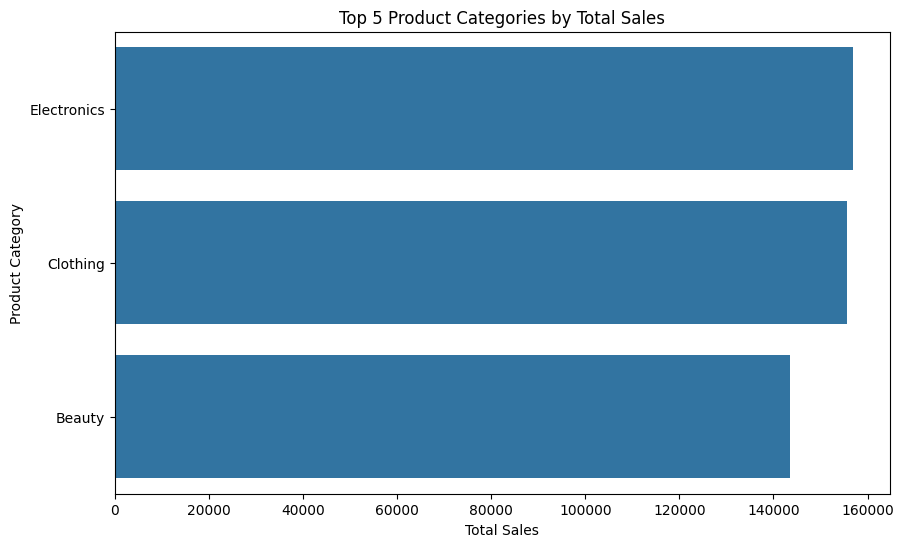

In [17]:
top5_products = product_sales.head(5)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top5_products.values, y=top5_products.index)
plt.title('Top 5 Product Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

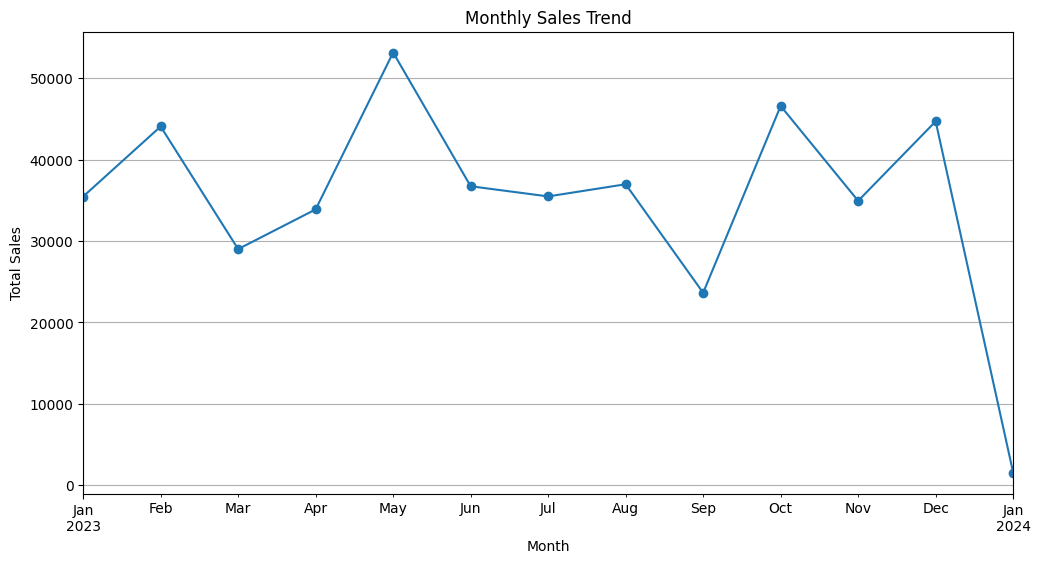

In [18]:
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [19]:
print("Best-selling product category:", product_sales.idxmax())
print("Month with highest sales:", monthly_sales.idxmax())

Best-selling product category: Electronics
Month with highest sales: 2023-05


In [20]:
df.to_csv('cleaned_retail_sales_data.csv', index=False)
